In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import json
from matplotlib.pyplot import figure
import matplotlib

In [2]:
#Read the file
df=pd.read_csv("U.S._State_and_Territorial_Stay-At-Home_Orders__March_15__2020___May_31__2021_by_County_by_Day.csv")
#df = pd.read_csv("U.S._State_and_Territorial_Stay-At-Home_Orders__March_15__2020___May_31__2021_by_County_by_Day.csv", nrows=10000)

In [3]:
#Drop empty raws
df.dropna(axis=0, inplace=True)

In [4]:
#Filter the data for only a specific state and quarter
#df=df[(df["State_Tribe_Territory"]=="California") & (df["Quarter"]==1)]

#Dropping the columns that are not needed
df.drop(columns=['FIPS_Code', 'Citations', 'SAH_Order_Code','County_Name'], inplace=True)

In [5]:
df.count()

State_Tribe_Territory    2357659
Date                     2357659
Stay_at_Home_Order       2357659
dtype: int64

In [6]:
#Converting the date column to a datetime format
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
#Calculate the quarter for each date
df["Quarter"]=df["Date"].dt.quarter

In [8]:
#Renaming columns
df.rename(columns={'State_Tribe_Territory':'State', 'County_Name':'County', 'Date':'Date', 'Quarter':'Quarter', 'Stay_at_Home_Order':'Stay_at_Home_Order'}, inplace=True)
#Setting State as index
df.set_index('State', inplace=False)

# Sort the DataFrame by the Date column in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)

df.head()

,State,Date,Stay_at_Home_Order,Quarter
1544887,Puerto Rico,2020-03-15,Mandatory for all individuals,1
2355858,Puerto Rico,2020-03-15,Mandatory for all individuals,1
1701858,Puerto Rico,2020-03-15,Mandatory for all individuals,1
1793254,Puerto Rico,2020-03-15,Mandatory for all individuals,1
2212340,Puerto Rico,2020-03-15,Mandatory for all individuals,1


In [9]:
dates = pd.date_range(start='2020-03-15', end='2021-12-31', freq='M')
quarters = dates.to_period("Q")
df.head()

,State,Date,Stay_at_Home_Order,Quarter
1544887,Puerto Rico,2020-03-15,Mandatory for all individuals,1
2355858,Puerto Rico,2020-03-15,Mandatory for all individuals,1
1701858,Puerto Rico,2020-03-15,Mandatory for all individuals,1
1793254,Puerto Rico,2020-03-15,Mandatory for all individuals,1
2212340,Puerto Rico,2020-03-15,Mandatory for all individuals,1


In [10]:
#df['Period']=df['Date'].astype(str) + df['Quarter'].astype(str)
df['Quarter'] = df['Date'].dt.quarter
df['Quarter'] = df['Quarter'].apply(lambda x: 'Q' + str(x))

df['Period'] = df['Date'].dt.strftime('%Y') + "-" + df['Quarter']

df.drop(columns=['Quarter'], inplace=True)
df.head()


,State,Date,Stay_at_Home_Order,Period
1544887,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
2355858,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
1701858,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
1793254,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
2212340,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1


In [11]:
#Filter the original DataFrame df to include only rows where the value in the "Stay_at_Home_Order" column is "Mandatory for all individuals"
mandatory_orders = df[df["Stay_at_Home_Order"] == "Mandatory for all individuals"]
mandatory_orders

,State,Date,Stay_at_Home_Order,Period
1544887,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
2355858,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
1701858,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
1793254,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
2212340,Puerto Rico,2020-03-15,Mandatory for all individuals,2020-Q1
...,...,...,...,...
2409658,California,2021-01-24,Mandatory for all individuals,2021-Q1
1950900,California,2021-01-24,Mandatory for all individuals,2021-Q1
1755278,California,2021-01-24,Mandatory for all individuals,2021-Q1
1820020,California,2021-01-24,Mandatory for all individuals,2021-Q1


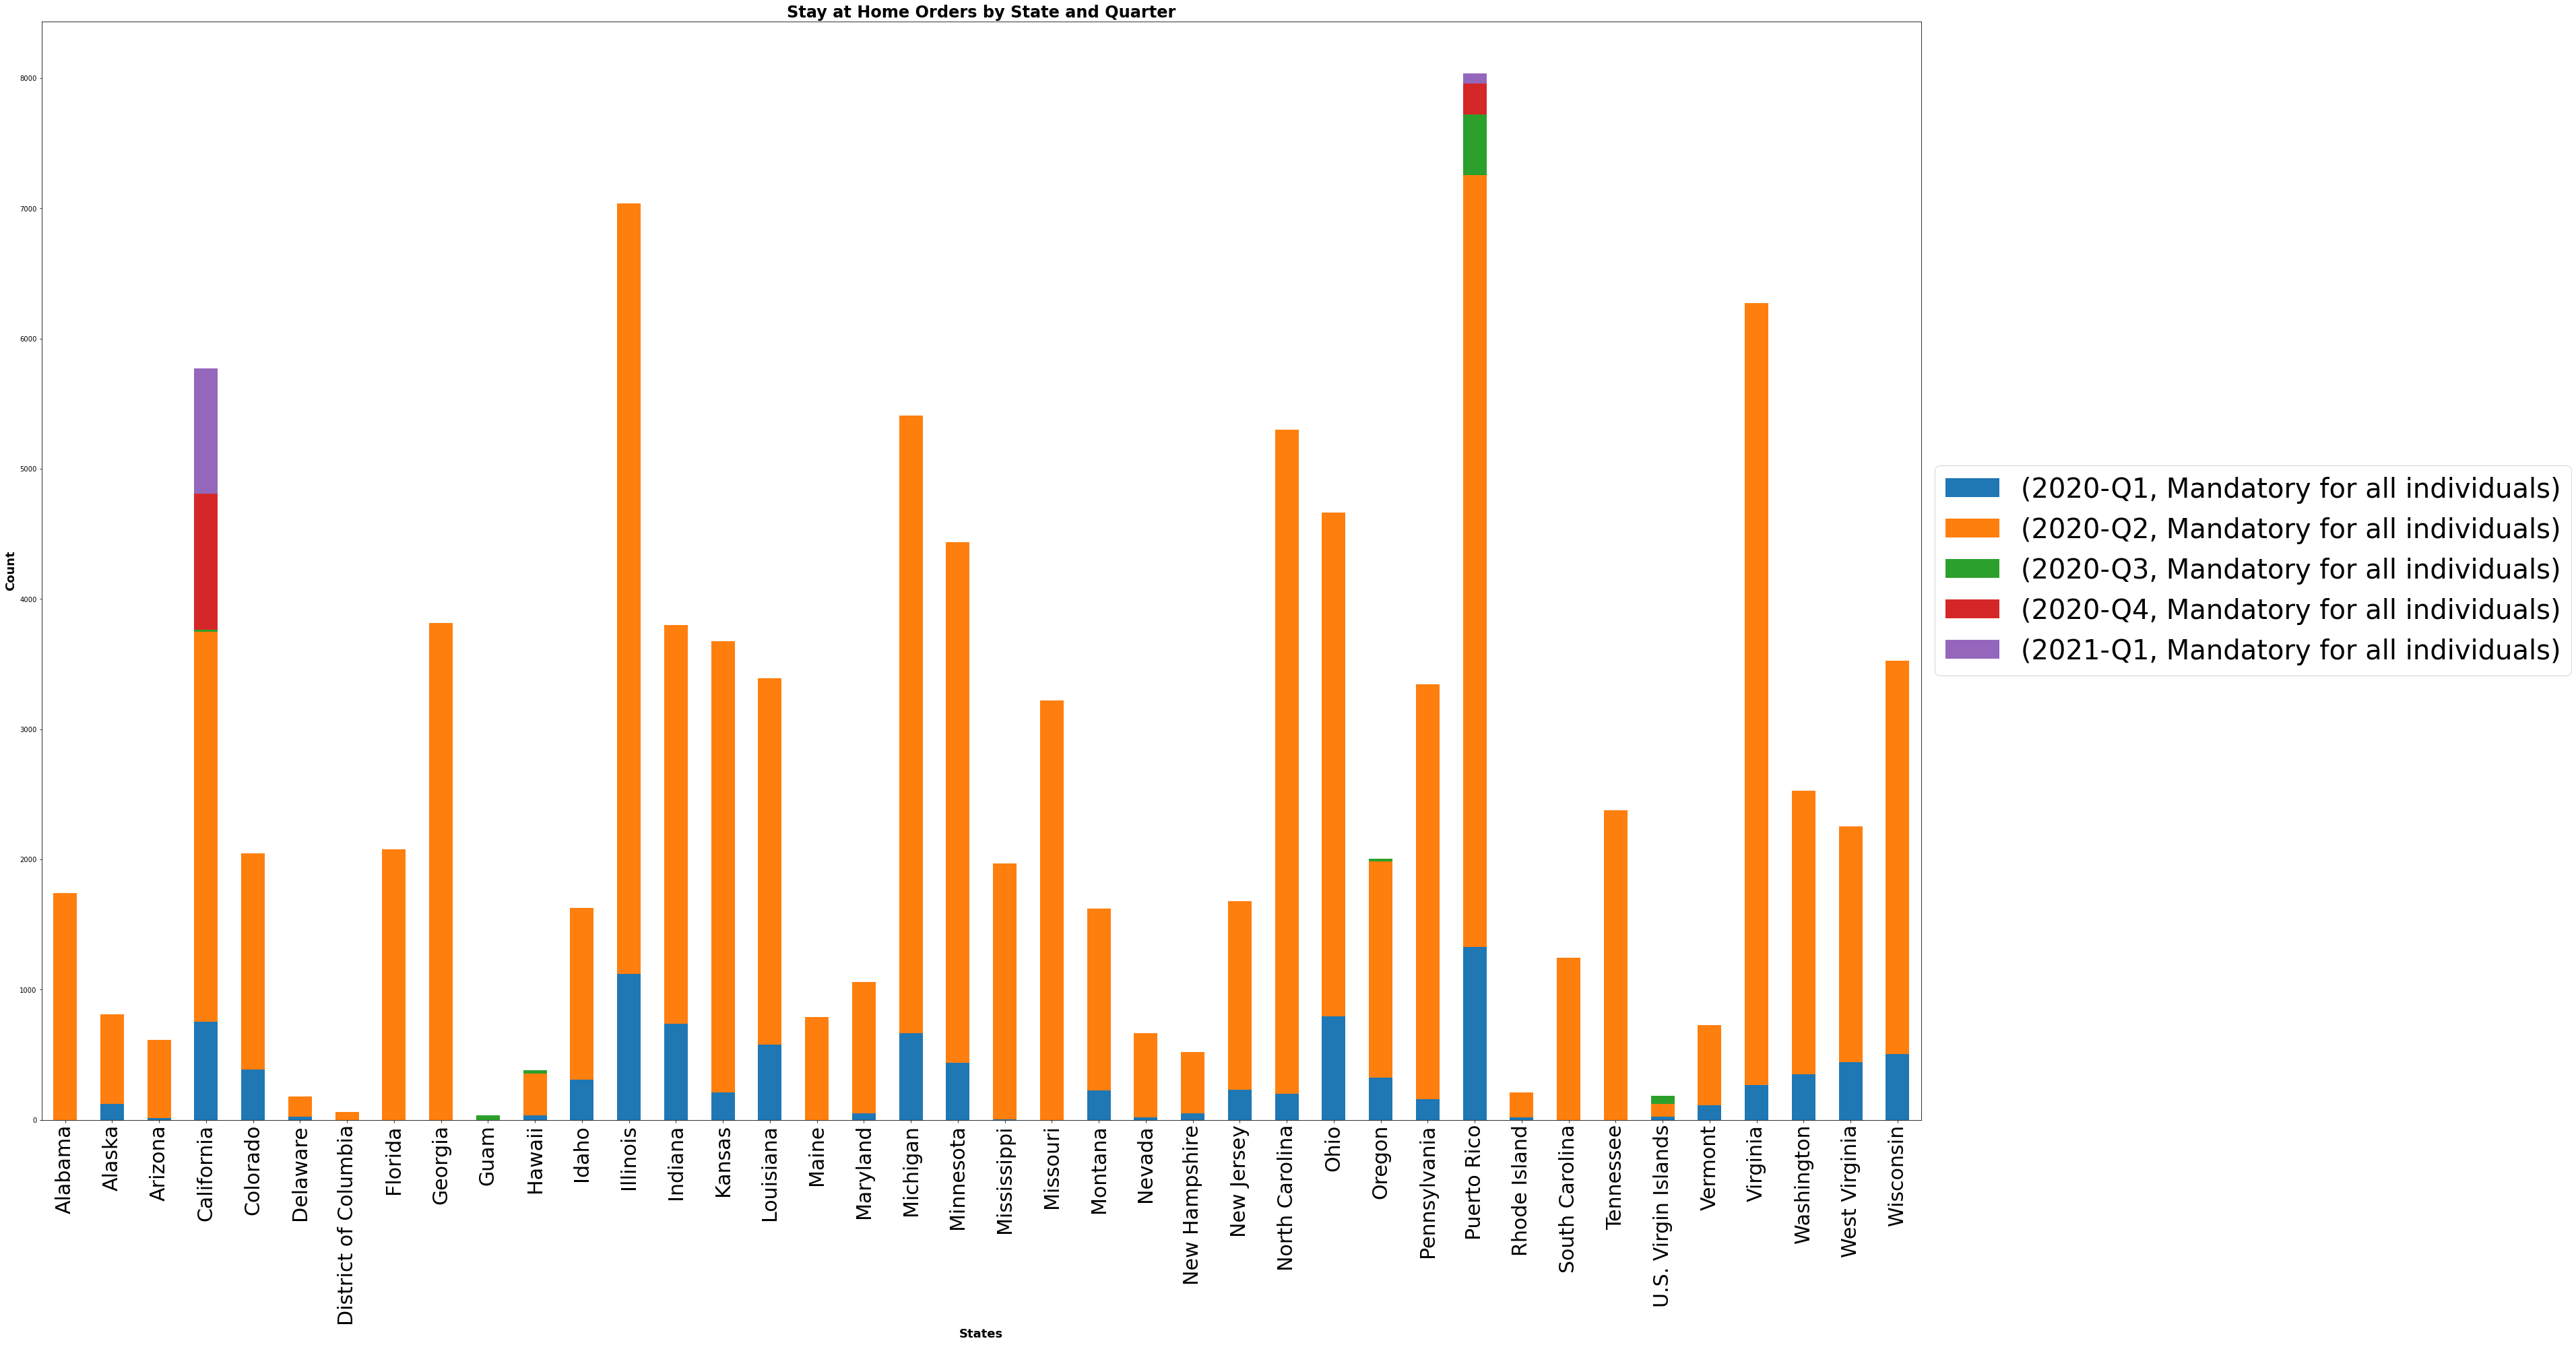

In [12]:
# Create a new DataFrame with the count of each category of stay-at-home order per state and quarter
df_categories = pd.DataFrame(mandatory_orders.groupby(["State", "Period", "Stay_at_Home_Order"]).size(), columns=["Count"])
df_categories = df_categories.reset_index()

# Create a pivot table to reshape the data into the desired format
df_categories_pivot = df_categories.pivot_table(index="State", columns=["Period", "Stay_at_Home_Order"], values="Count")

# Plot the stacked bar plot
df_categories_pivot.plot(kind="bar", figsize=(50,30), stacked=True)

# Add the x-axis label and y-axis label
plt.xlabel("States", fontsize=18, weight='bold')
plt.ylabel("Count", fontsize=18, weight='bold')

# Add the title
plt.title("Stay at Home Orders by State and Quarter", fontsize=24, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=40)
plt.xticks(fontsize=30)
# Show the plot
plt.show()

In [13]:
advisory_orders=df[df["Stay_at_Home_Order"] == "Advisory"]

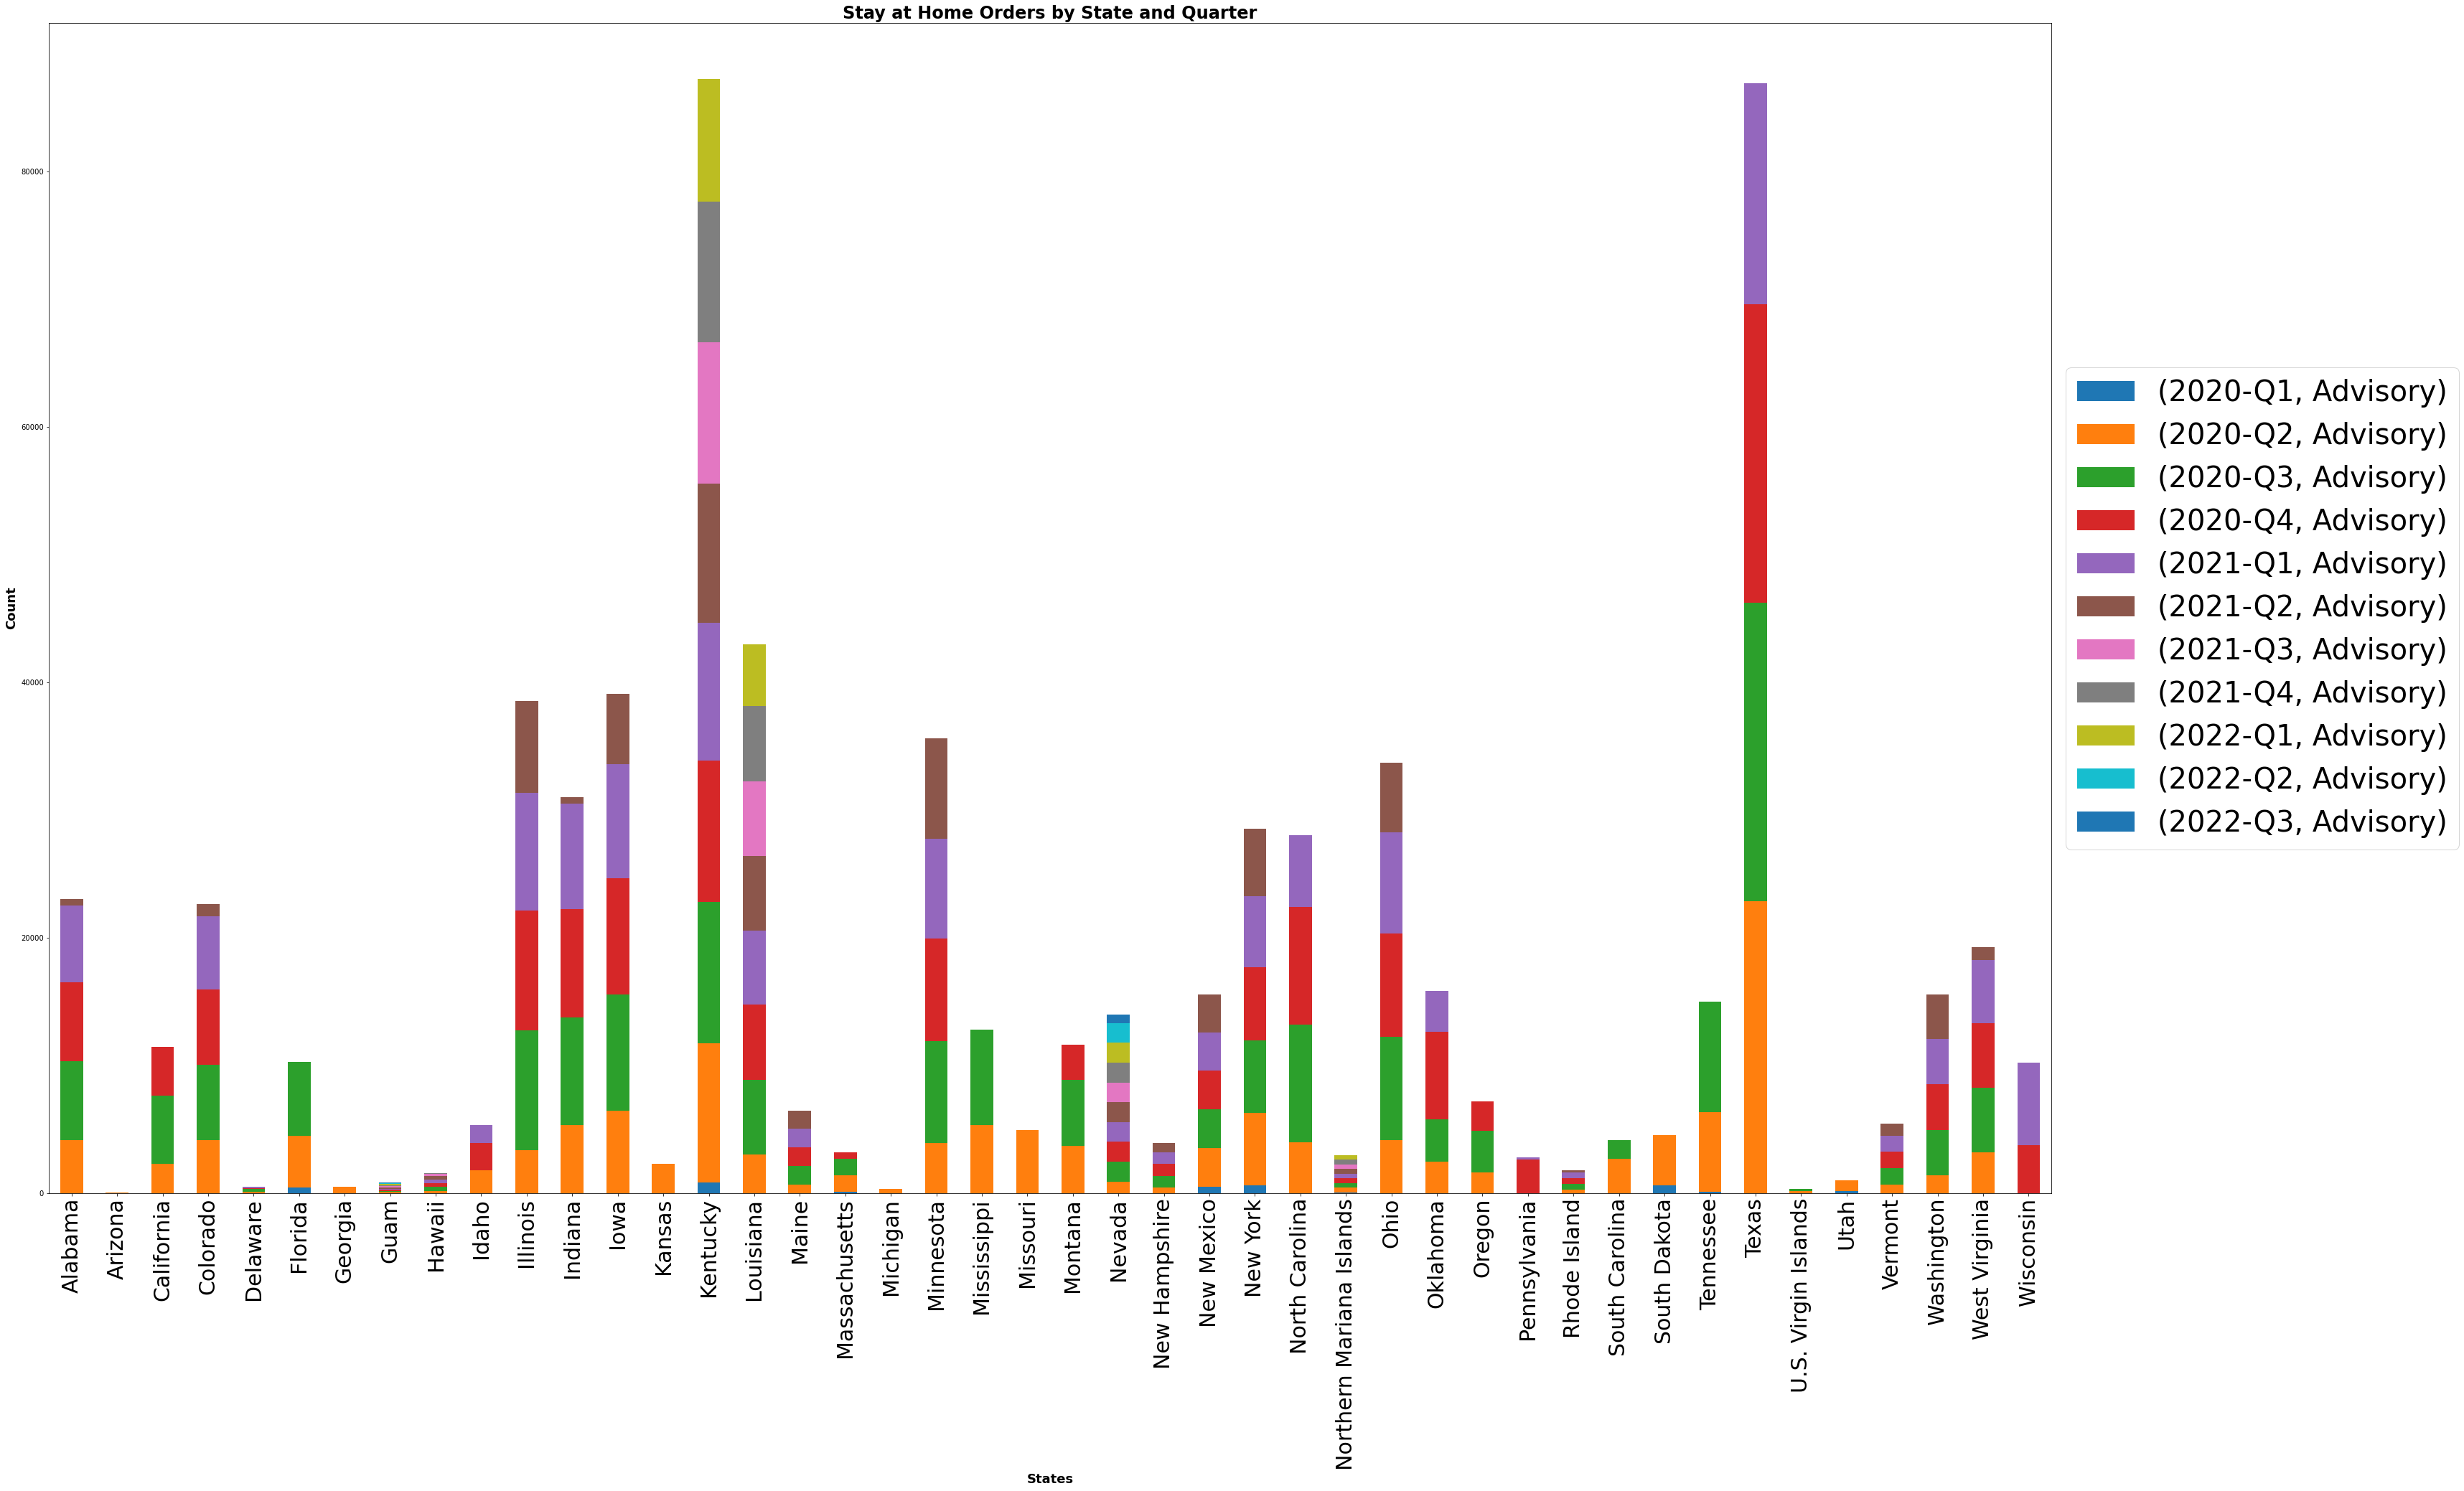

In [14]:
## Create a new DataFrame with the count of each category of stay-at-home order per state and quarter
df_categories = pd.DataFrame(advisory_orders.groupby(["State", "Period", "Stay_at_Home_Order"]).size(), columns=["Count"])
df_categories = df_categories.reset_index()

# Create a pivot table to reshape the data into the desired format
df_categories_pivot = df_categories.pivot_table(index="State", columns=["Period", "Stay_at_Home_Order"], values="Count")

# Plot the stacked bar plot
df_categories_pivot.plot(kind="bar", figsize=(50,30), stacked=True)

# Add the x-axis label and y-axis label
plt.xlabel("States", fontsize=18, weight='bold')
plt.ylabel("Count", fontsize=18, weight='bold')

# Add the title
plt.title("Stay at Home Orders by State and Quarter", fontsize=24, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=40)
plt.xticks(fontsize=30)
# Show the plot
plt.show()

In [15]:
No_order_to_stay_at_home=df[df["Stay_at_Home_Order"] == "No order to stay at home"]


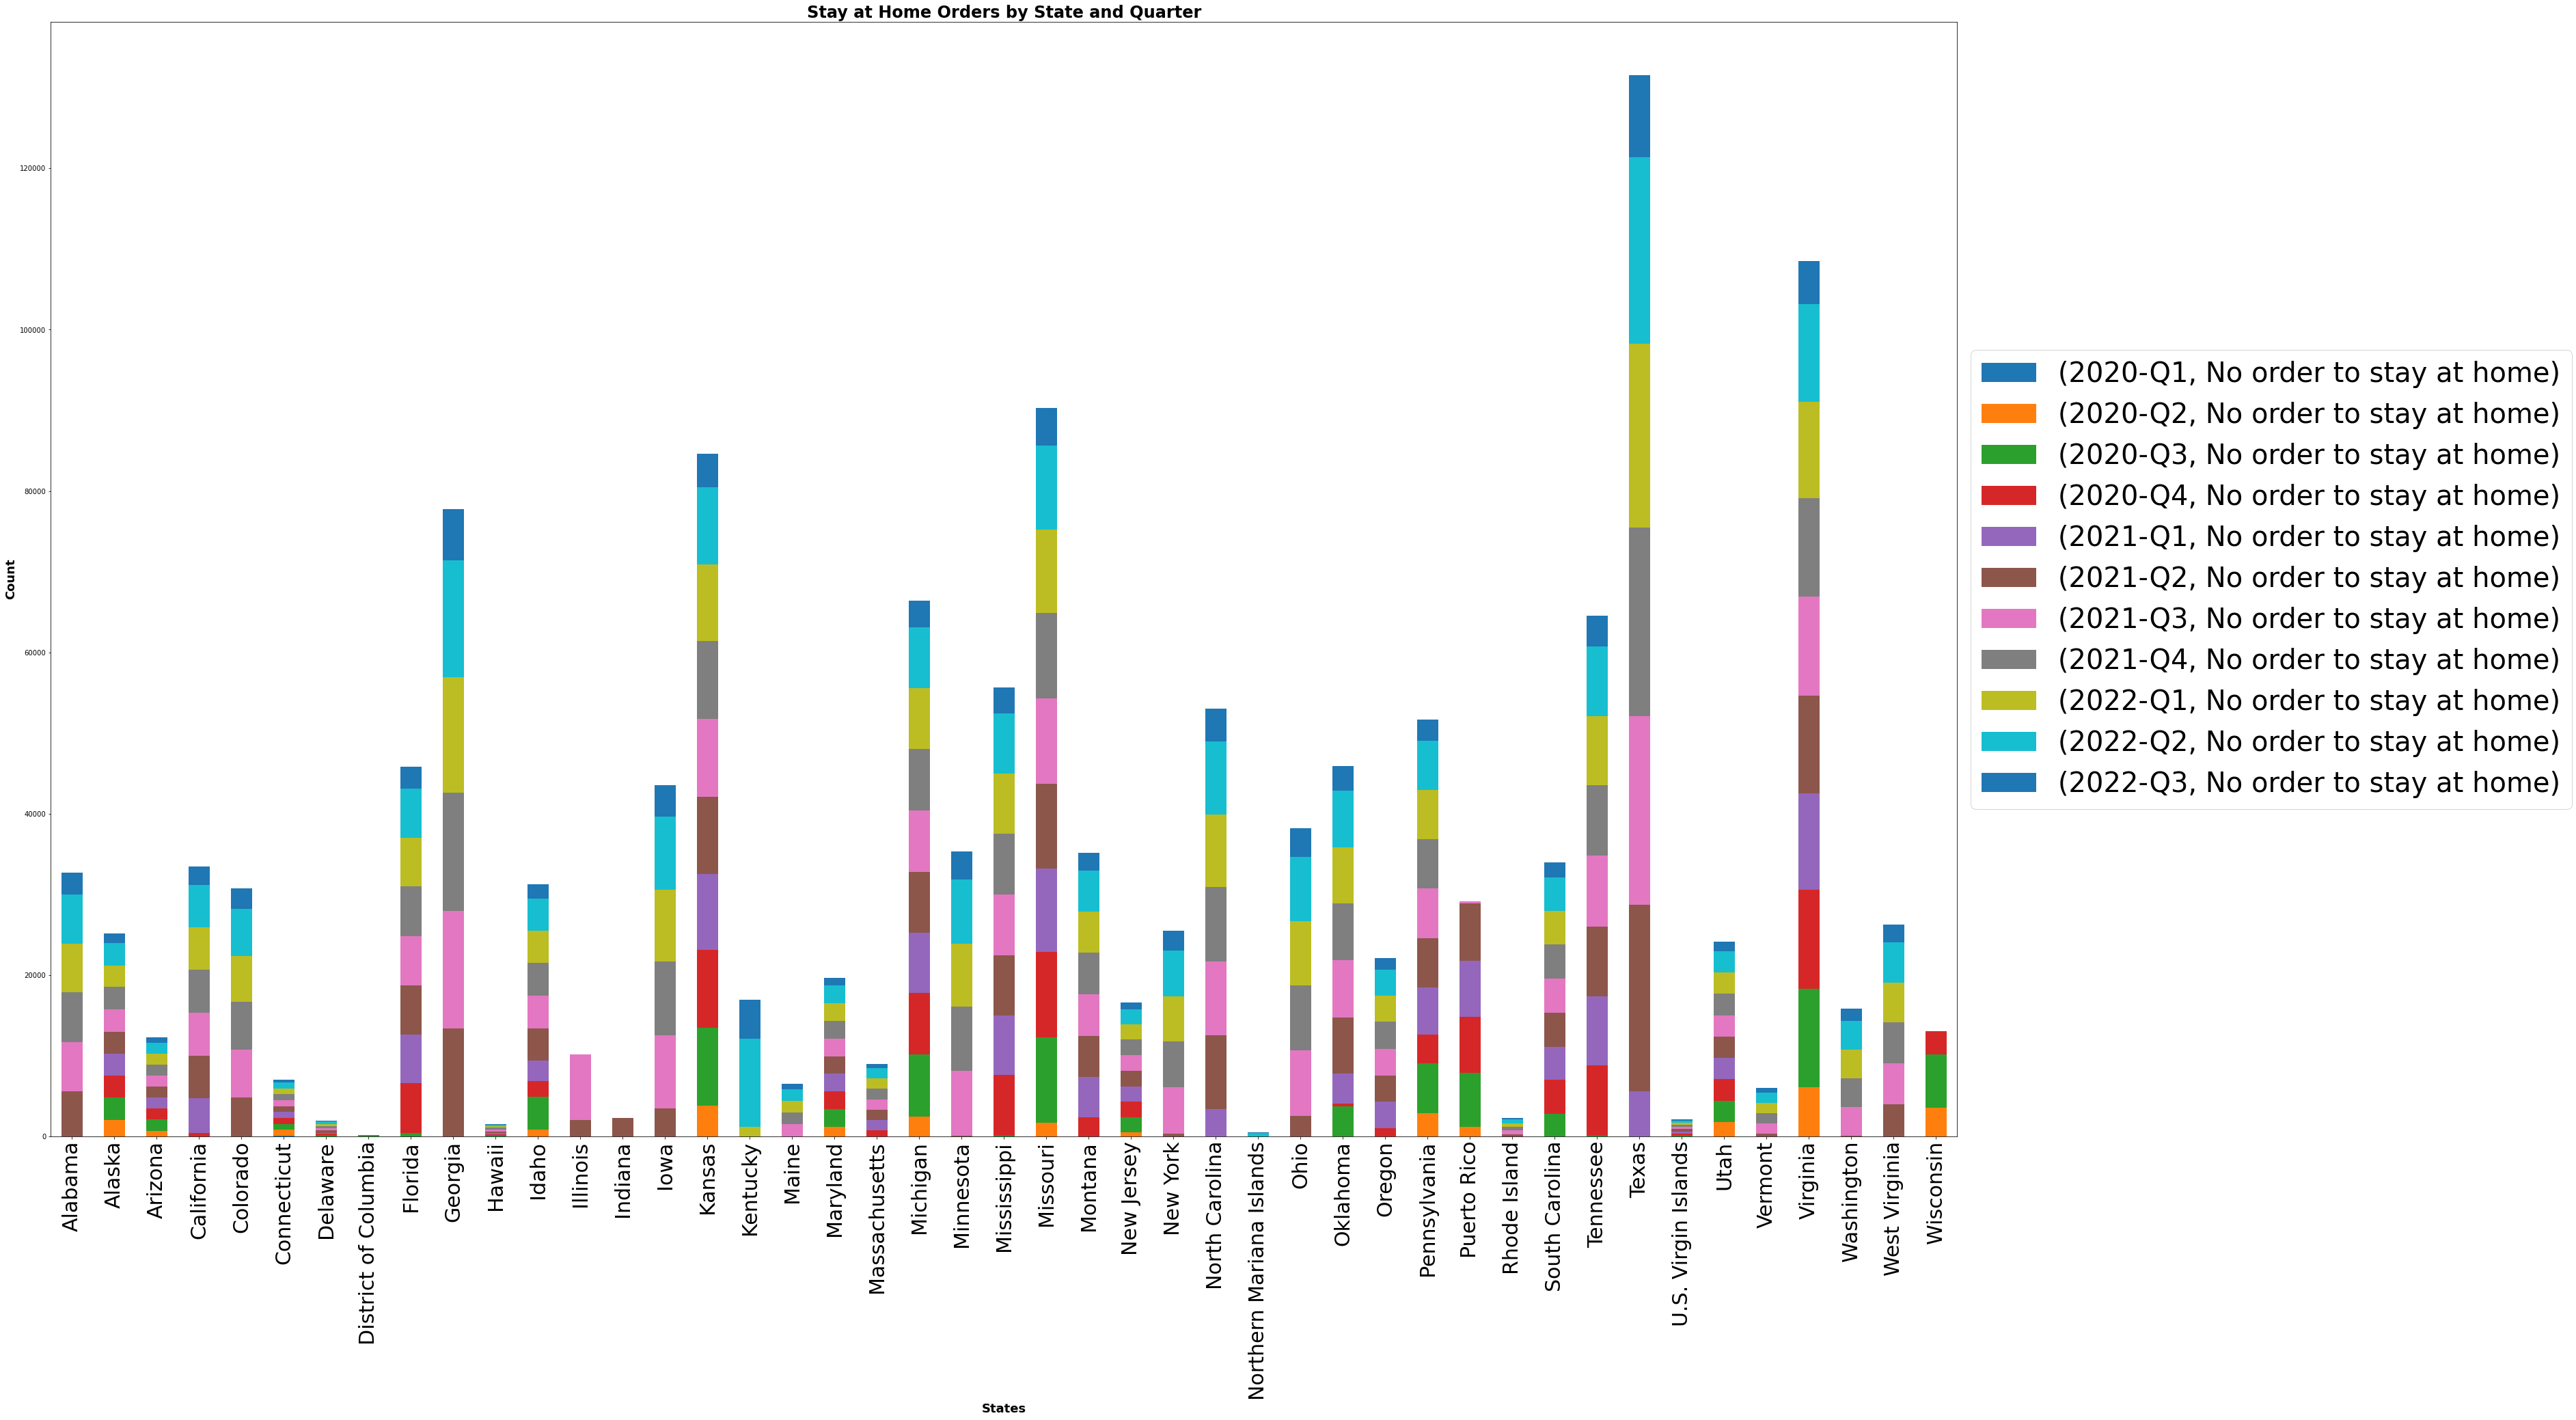

In [16]:
# Create a new DataFrame with the count of each category of stay-at-home order per state and quarter
df_categories = pd.DataFrame(No_order_to_stay_at_home.groupby(["State", "Period", "Stay_at_Home_Order"]).size(), columns=["Count"])
df_categories = df_categories.reset_index()

# Create a pivot table to reshape the data into the desired format
df_categories_pivot = df_categories.pivot_table(index="State", columns=["Period", "Stay_at_Home_Order"], values="Count")

# Plot the stacked bar plot
df_categories_pivot.plot(kind="bar", figsize=(50,30), stacked=True)

# Add the x-axis label and y-axis label
plt.xlabel("States", fontsize=18, weight='bold')
plt.ylabel("Count", fontsize=18, weight='bold')

# Add the title
plt.title("Stay at Home Orders by State and Quarter", fontsize=24, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=40)
plt.xticks(fontsize=30)
# Show the plot
plt.show()

# Analysis

This dataset provides information on the stay-at-home orders implemented in US states and territories during the Covid-19 pandemic. The data is divided into quarters for a better understanding of when the orders were implemented

The first bar graph shows the number of mandatory stay-at-home orders implemented in each state and territory during each quarter of the pandemic. 
Overall, the graphs demonstrate that there was a significant increase in the number of mandatory stay-at-home orders implemented in the second quarter of 2020, with many states and territories implementing these orders during this period. By the third quarter of 2020, most states had moved to advisory orders, with only a few areas still implementing mandatory orders.

The graph also shows that the number of mandatory stay-at-home orders decreased significantly after the third quarter of 2020, with only California and Puerto Rico implementing new mandatory orders during the fourth quarter of 2020 and the first quarter of 2021.

The second bar graph shows that there were still a significant number of advisory stay-at-home orders implemented in many states and territories in the third and fourth quarters of 2020, with Texas and Kentucky having the most advisory orders overall.

The 3rd graph shows that there were a few states that had no orders to stay at home in the 2nd Quarter of 2020 and by the 2nd quarter of 2021 almost all states had no at stay orders.

In summary, the dataset and bar graphs provide valuable information on the stay-at-home orders implemented in the US during the Covid-19 pandemic and demonstrate the shift from mandatory to advisory to no at stay home orders.We notice that different states had different approaches to stay-at-home orders, with some implementing more orders than others, and with different timelines for implementing and ending orders.

The analysis suggests that stay-at-home orders were a common response to the Covid-19 pandemic, but the specific approach varied by state and over time.



